# Clustering

The dataset given is about the Health and economic conditions in different States of a country. The Group States based on how similar their situation is, so as to provide these groups to the government so that appropriate measures can be taken to escalate their Health and Economic conditions.

##1 Clustering: Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, etc)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

In [ ]:
# Get the Data
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/Data/State_wise_Health_income.csv"
df=pd.read_csv(path)

Mounted at /content/drive


### Basic Check

In [ ]:
df.head()

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22


In [ ]:
# Remove unwanted column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.head()

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,Bachevo,417,66,564,1823
1,Balgarchevo,1485,646,2710,73662
2,Belasitsa,654,299,1104,27318
3,Belo_Pole,192,25,573,250
4,Beslen,43,8,528,22


In [ ]:
df.shape

(297, 5)

In [ ]:
# Find data type of each column
df.dtypes

States               object
Health_indeces1       int64
Health_indices2       int64
Per_capita_income     int64
GDP                   int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   States             297 non-null    object
 1   Health_indeces1    297 non-null    int64 
 2   Health_indices2    297 non-null    int64 
 3   Per_capita_income  297 non-null    int64 
 4   GDP                297 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 11.7+ KB


In [ ]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Health_indeces1,297.0,2630.15,2038.51,-10.0,641.0,2451.0,4094.0,10219.0
Health_indices2,297.0,693.63,468.94,0.0,175.0,810.0,1073.0,1508.0
Per_capita_income,297.0,2156.92,1491.85,500.0,751.0,1865.0,3137.0,7049.0
GDP,297.0,174601.12,167167.99,22.0,8721.0,137173.0,313092.0,728575.0


In [ ]:
df.States.value_counts()

Dromore          2
Crossmaglen      1
Crossgar         1
Creggan          1
Creagh           1
                ..
Ballymacmaine    1
Ballylinney      1
Ballylesson      1
Ballykinler      1
Groggan          1
Name: States, Length: 296, dtype: int64

In [ ]:
#Find null values in respective columns
pd.DataFrame(df.isnull().sum())

,0
States,0
Health_indeces1,0
Health_indices2,0
Per_capita_income,0
GDP,0


In [ ]:
# Find if duplicate values is there
df.duplicated().sum()

0

### Remove outlier

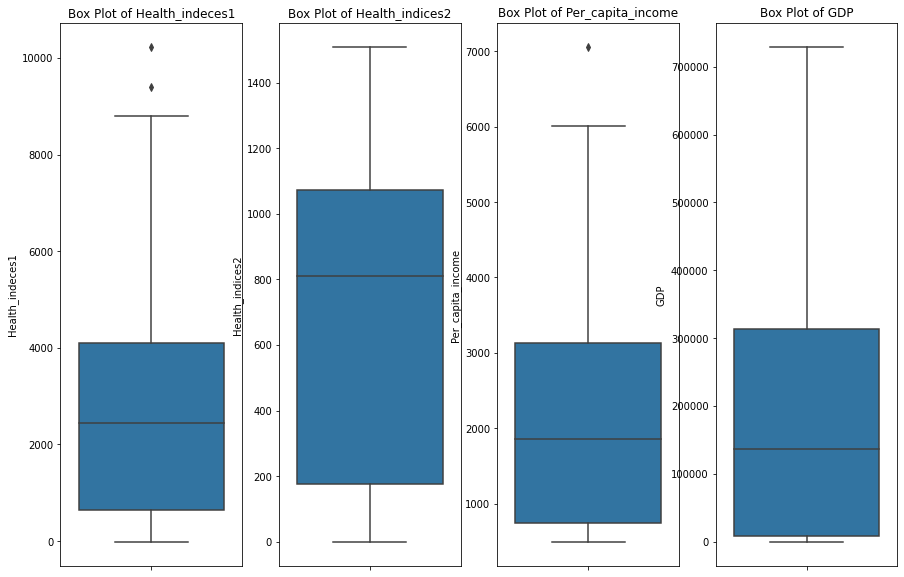

In [ ]:
plt.figure(figsize=(15,10))
j=1
for i in df.columns.drop('States'):
    plt.subplot(1,4,j)
    sns.boxplot(y=df[i]);
    plt.title('Box Plot of '+i)
    j=j+1

In [ ]:
for i in df.columns.drop('States'):
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ur=q3+1.5*iqr
    lr=q1-1.5*iqr
    df[i]=np.where(df[i]>ur,ur,df[i])
    df[i]=np.where(df[i]<lr,lr,df[i])

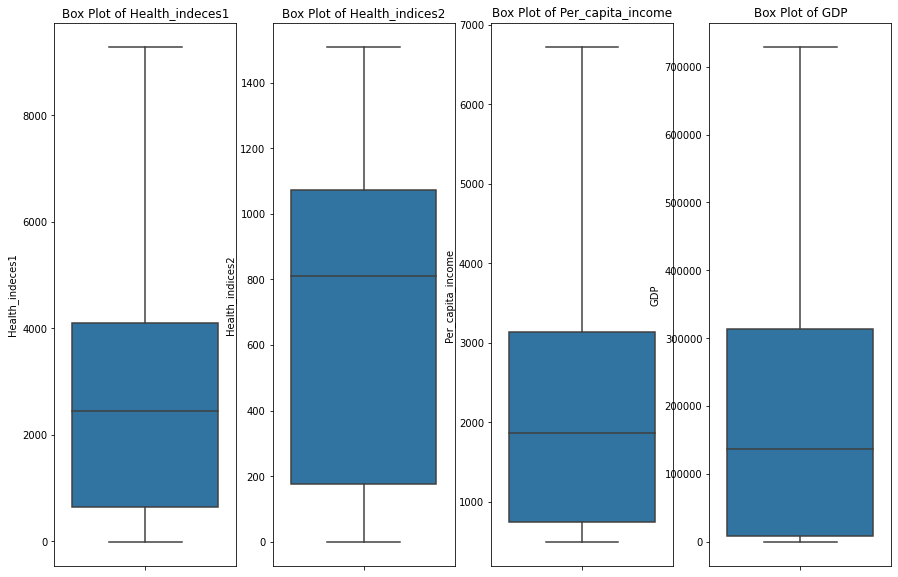

In [ ]:
plt.figure(figsize=(15,10))
j=1
for i in df.columns.drop('States'):
    plt.subplot(1,4,j)
    sns.boxplot(y=df[i]);
    plt.title('Box Plot of '+i)
    j=j+1

### Univariate Analysis


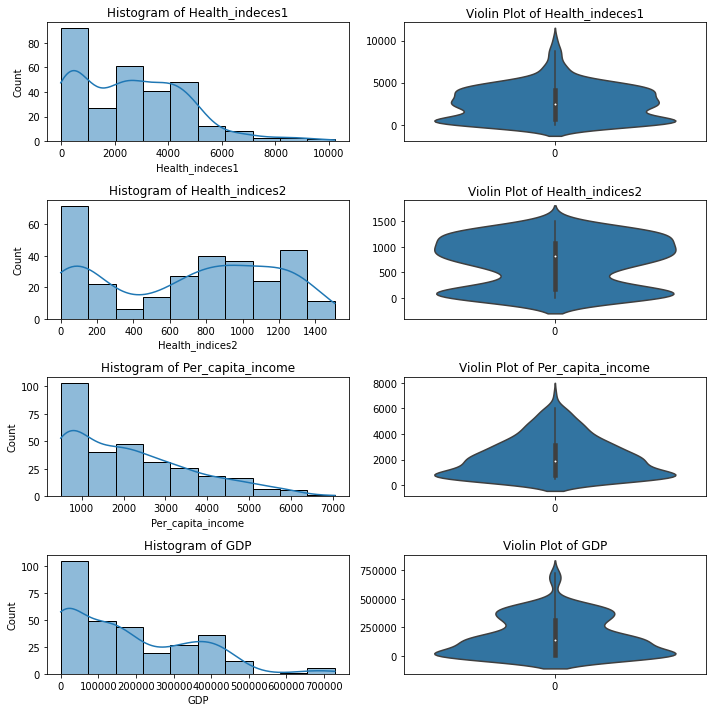

In [ ]:
plt.figure(figsize=(10,10))
j=1
for i in df.columns.drop('States'):
    plt.subplot(4,2,j)
    sns.histplot(df[i],kde=True);
    plt.title('Histogram of '+i,fontsize=12)
    k=j+1
    plt.subplot(4,2,k)
    sns.violinplot(df[i]);
    plt.title('Violin Plot of '+i,fontsize=12)
    j=k+1

plt.tight_layout()
    

In [ ]:
#To find the skeweness of every column
skewness = pd.DataFrame(df.skew().round(2).sort_values()).reset_index()
skewness = skewness.rename(columns = {'index':'Attributes',0:'skewness'})
skewness

,Attributes,skewness
0,Health_indices2,-0.17
1,Health_indeces1,0.72
2,Per_capita_income,0.82
3,GDP,0.83


In [ ]:
# Find kurtosis of all column
pd.DataFrame(df.kurtosis(),columns=['kurtosis']).round(2).rename_axis(index='Feature')

,kurtosis
Feature,
Health_indeces1,0.44
Health_indices2,-1.40
Per_capita_income,-0.12
GDP,0.06


Insights:

From above plots and tables, we can conclude below points,

Health Indeces1 and GDP features have positive kurtosis.
Health Indeces2 and Per capita income features have negative kurtosis.

### Bivariate Analysis


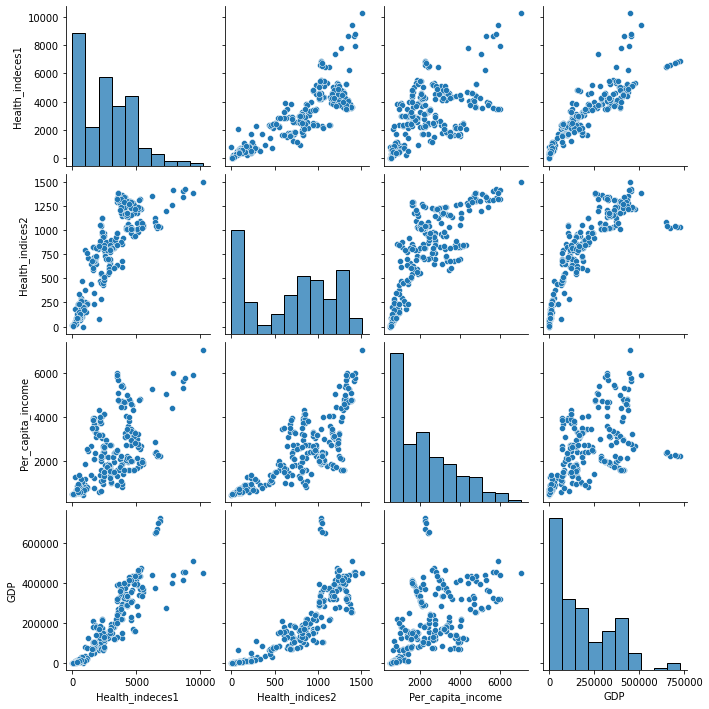

In [ ]:
#Pair Plot
sns.pairplot(data=df);

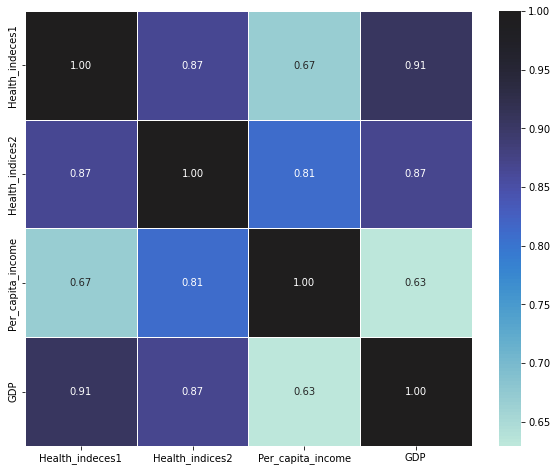

In [ ]:
# Heatmap of correlation
df_corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, linewidths=.5, fmt= '.2f', center = 1 ) 
plt.show()

## 2 Clustering: Do you think scaling is necessary for clustering in this case? Justify.

Scaling is required to bring all the features into a common scale before proceeding to clustering.

If we don’t scale the data, it gives higher weightage to features which have higher magnitude. 


In [ ]:
c=df.describe().T.round(2)
c=c[['mean','std','min','max']]
c['variance']=c['std']**2
c = c.rename_axis(index='Feature')


,mean,std,min,max,variance
Feature,,,,,
Health_indeces1,2626.53,2025.87,-10.0,9273.5,4.104149e+06
Health_indices2,693.63,468.94,0.0,1508.0,2.199047e+05
Per_capita_income,2155.79,1488.29,500.0,6716.0,2.215007e+06
GDP,174601.12,167167.99,22.0,728575.0,2.794514e+10


Here the mean, min, max, std and variance are highly varied as the data is not scaled.



## 3 Clustering: Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using a Dendrogram and briefly describe them.

### Scale the data using z score method

In [ ]:
#Scale the Data using Z-Score Method
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
dfscaled=pd.DataFrame(ss.fit_transform(df.drop('States',axis=1)),columns=df.columns.drop('States'))

In [ ]:
dfscaled.head().round(2)

,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,-1.09,-1.34,-1.07,-1.04
1,-0.56,-0.10,0.37,-0.60
2,-0.97,-0.84,-0.71,-0.88
3,-1.20,-1.43,-1.06,-1.04
4,-1.27,-1.46,-1.09,-1.05


### Dendrogram

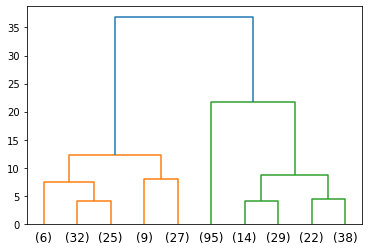

In [ ]:
lk=linkage(dfscaled,method='ward')
dgrm=dendrogram(lk,p=10,truncate_mode='lastp')

In [ ]:
Hclusters=fcluster(lk,3,criterion='maxclust')
Hclusters

array([2, 3, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 3, 2,
       2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 1, 2, 2, 1, 3, 2, 3, 2, 2, 3, 3,
       3, 2, 2, 1, 2, 2, 2, 3, 2, 1, 2, 3, 3, 2, 2, 3, 3, 2, 2, 1, 3, 2,
       3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2,
       2, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 1, 2, 3, 2, 3, 3, 2, 2,
       2, 1, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 1, 2, 3, 2, 2, 3, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 1, 2, 3, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int3

From dendrogram it is observed that based on distance or increase in within sum squares (WSS) the optimum no. of cluster is three.

In [ ]:
dfhc=df.copy()
dfhc['Hclusters']=Hclusters

In [ ]:
dfhc.head()

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP,Hclusters
0,Bachevo,417,66,564,1823,2
1,Balgarchevo,1485,646,2710,73662,3
2,Belasitsa,654,299,1104,27318,2
3,Belo_Pole,192,25,573,250,2
4,Beslen,43,8,528,22,2


In [ ]:
dfhc.groupby(by='Hclusters').mean().round(1)

,Health_indeces1,Health_indices2,Per_capita_income,GDP
Hclusters,,,,
1,4923.5,1201.6,3375.1,377132.5
2,401.1,104.5,680.7,5388.8
3,2481.8,748.7,2347.6,136004.7


##4 Clustering: Apply K-Means clustering on scaled data and determine optimum clusters. Apply the elbow curve and find the silhouette score.

### K Mean clustering

In [ ]:
# WSS
wss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state=1,max_iter=1000)
    km.fit(dfscaled)
    wss.append(km.inertia_)

In [ ]:
u=pd.DataFrame(wss,columns=['WSS'])
u['Number_of_Clusters']=range(1,11)

In [ ]:
u=u[['Number_of_Clusters','WSS']]
u.round(2)

,Number_of_Clusters,WSS
0,1,1188.00
1,2,471.36
2,3,260.57
3,4,183.61
4,5,149.79
5,6,117.32
6,7,91.32
7,8,79.80
8,9,71.07
9,10,63.73


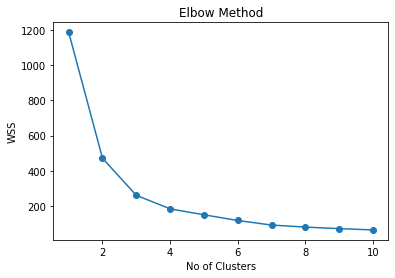

In [ ]:
# Elbow Plot Method
plt.plot(range(1,11),wss,marker='o');
plt.xlabel('No of Clusters');
plt.ylabel('WSS');
plt.title('Elbow Method');

###Silhouette Score Method

In [ ]:
#Silhouette_score
silscore=[]
for i in range(2,11):
    km=KMeans(n_clusters=i,random_state=1,max_iter=1000)
    km.fit(dfscaled)
    silscore.append(silhouette_score(dfscaled,km.labels_))

In [ ]:
v=pd.DataFrame(silscore,columns=['Silhouette_Score'])
v['Number_of_Clusters']=range(2,11)
v=v[['Number_of_Clusters','Silhouette_Score']]
v.round(2)

,Number_of_Clusters,Silhouette_Score
0,2,0.53
1,3,0.53
2,4,0.55
3,5,0.52
4,6,0.53
5,7,0.56
6,8,0.53
7,9,0.51
8,10,0.51


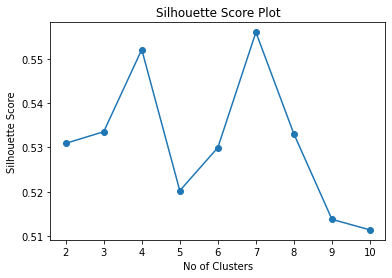

In [ ]:
#Silhouette Score plot
plt.plot(range(2,11),silscore,marker='o');
plt.xlabel('No of Clusters');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score Plot');

In [ ]:
kmf=KMeans(n_clusters=3,random_state=1)
kmf.fit(dfscaled)

In [ ]:
kmclusters=kmf.labels_
kmclusters

array([0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0,
       0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int3

In [ ]:
dfkmc=dfhc.copy()
dfkmc['kmclusters']=kmclusters
dfkmc.drop('Hclusters',axis=1).head()

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP,kmclusters
0,Bachevo,417,66,564,1823,0
1,Balgarchevo,1485,646,2710,73662,1
2,Belasitsa,654,299,1104,27318,0
3,Belo_Pole,192,25,573,250,0
4,Beslen,43,8,528,22,0


In [ ]:
dfkmc.head()

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP,Hclusters,kmclusters
0,Bachevo,417,66,564,1823,2,0
1,Balgarchevo,1485,646,2710,73662,3,1
2,Belasitsa,654,299,1104,27318,2,0
3,Belo_Pole,192,25,573,250,2,0
4,Beslen,43,8,528,22,2,0


In [ ]:
dfkmc.kmclusters.value_counts()

0    101
1    101
2     95
Name: kmclusters, dtype: int64

##5 Clustering: Describe cluster profiles for the clusters defined. Recommend different priority-based actions that need to be taken for different clusters on the bases of their vulnerability situations according to their Economic and Health Conditions.

Mapping of K-Means Clusters with Hierarchical Clusters

In [ ]:
dfkmc.head()

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP,Hclusters,kmclusters
0,Bachevo,417,66,564,1823,2,0
1,Balgarchevo,1485,646,2710,73662,3,1
2,Belasitsa,654,299,1104,27318,2,0
3,Belo_Pole,192,25,573,250,2,0
4,Beslen,43,8,528,22,2,0


### Hierarchical Clustering

In [ ]:
dfhc.groupby('Hclusters').mean().round(1)

,Health_indeces1,Health_indices2,Per_capita_income,GDP
Hclusters,,,,
1,4912.7,1201.6,3371.8,377132.5
2,401.1,104.5,680.7,5388.8
3,2481.8,748.7,2347.6,136004.7


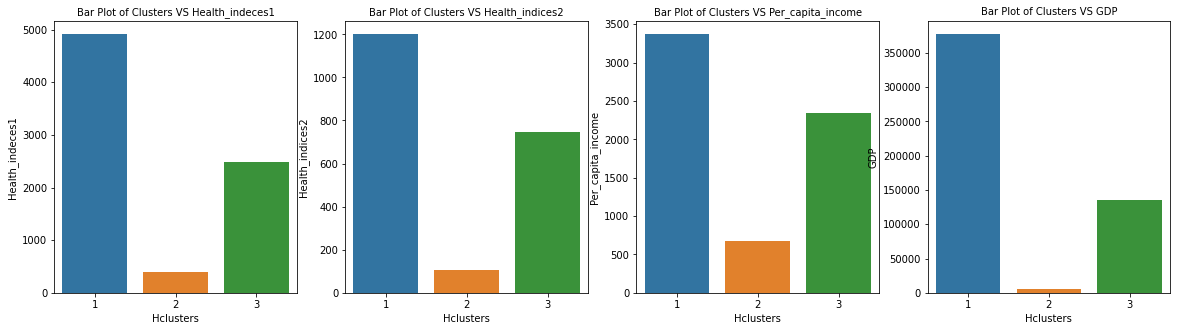

In [ ]:
plt.figure(figsize=(20,5))
j=1
for i in dfhc.columns.drop(['Hclusters','States']):
    plt.subplot(1,4,j)
    #t=dfhc.groupby('Hclusters').mean().sort_values(i,ascending=False)
    sns.barplot(y=dfhc[i],x=dfhc.Hclusters,ci=False);
    plt.title('Bar Plot of Clusters VS '+i,fontsize=10)
    j=j+1

In [ ]:
dfhc.Hclusters.value_counts()

3    103
1     99
2     95
Name: Hclusters, dtype: int64

### K-Means Clustering

In [ ]:
dfkmc.drop('Hclusters',axis=1).groupby('kmclusters').mean().round(1)

,Health_indeces1,Health_indices2,Per_capita_income,GDP
kmclusters,,,,
0,499.2,116.4,693.8,9428.1
1,4919.6,1212.3,3382.3,385648.6
2,2597.1,783.0,2464.1,141264.1


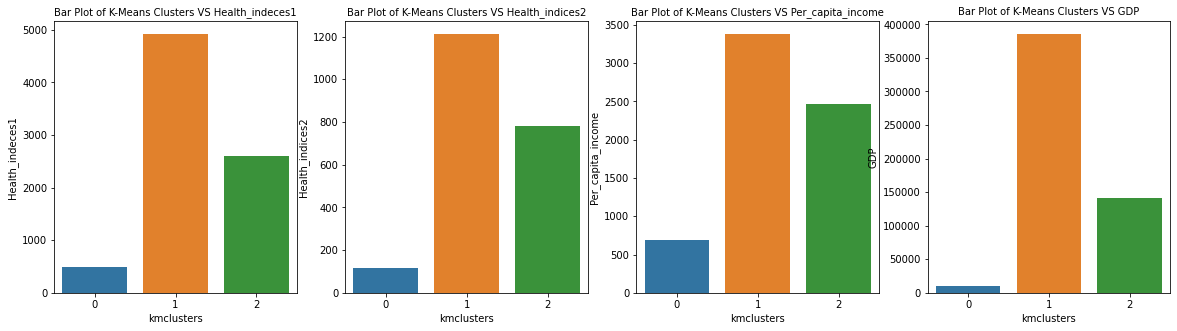

In [ ]:
plt.figure(figsize=(20,5))
j=1
for i in dfkmc.columns.drop(['States','Hclusters','kmclusters']):
    plt.subplot(1,4,j)
    sns.barplot(y=dfkmc[i],x=dfkmc.kmclusters,ci=False);
    plt.title('Bar Plot of K-Means Clusters VS '+i,fontsize=10)
    j=j+1

In [ ]:
dfkmc.kmclusters.value_counts()

0    101
2    101
1     95
Name: kmclusters, dtype: int64

By comparing means of different features in Hierarchical Clustering & K-Means Clustering, we can notice below key points.

Cluster 1 in Hierarchical Clustering (high health indices, high Per capita income and high GDP) is equivalent to Cluster 2 in K-Means Clustering.
Cluster 2 in Hierarchical Clustering (low health indices, low Per capita income and low GDP) is equivalent to Cluster 0 in K-Means Clustering.
Cluster 3 in Hierarchical Clustering (moderate health indices, moderate Per capita income and moderate GDP) is equivalent to Cluster 1 in K-Means Clustering.

States in K Means cluster 2 have high health indices, high Per capita income and high GDP. Hence, we can notice that these states may be considered as developed states.  Based on the budget availability, the government should introduce new strategies to improve health indices, per capita income and GDP and also government should strictly keep implementing the strategies which are already being executed in healthcare and financial departments (Equivalent to Cluster 3 in Hierarchical Clustering).

States in K Means cluster 0 have low health indices, low Per capita income and low GDP. Hence, we can notice that these states may be considered as underdeveloped states.Immediate actions are required by the government to develop the states in the health care and financial sectors. 
Government should introduce new strategies to improve health indices, per capita income and GDP 

Government should review the strategies which are being already executed in healthcare and financial departments and those strategies have to be reformed or discontinued based on in depth analysis 
